In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'STHeiti']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(font='STHeiti', style='whitegrid', font_scale=1.5)

from subprocess import check_output
print(check_output(['ls','../loan defaults']).decode('utf8'))

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

LoanStats_2018Q1.csv



In [2]:
#读取并观察特征
data = pd.read_csv('LoanStats_2018Q1.csv',skiprows=1)
data

/Users/nigle/untitled1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18500.0,18500.0,18500.0,36 months,13.58%,628.52,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,7000.0,7000.0,7000.0,36 months,7.34%,217.23,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,16000.0,16000.0,16000.0,60 months,11.98%,355.75,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,10.90%,915.36,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8300.0,8300.0,8300.0,36 months,7.34%,257.58,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,6000.0,6000.0,6000.0,36 months,6.07%,182.73,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,3125.0,3125.0,3125.0,36 months,21.85%,119.11,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3000.0,3000.0,3000.0,36 months,11.98%,99.62,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,6500.0,6500.0,6500.0,36 months,10.90%,212.50,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,10000.0,10000.0,10000.0,36 months,5.31%,301.11,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#查看数值型特征分布规则
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,107864.000000,107864.000000,107864.000000,107864.000000,1.078640e+05,0.0,0.0,107602.000000,107864.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,6.000000,6.000000
mean,NaN,16147.942780,16147.942780,16143.857775,469.664262,7.854227e+04,NaN,NaN,19.648209,0.223773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913.166667,65.841667,14.166667
std,NaN,10184.024938,10184.024938,10182.885389,289.225788,7.687436e+04,NaN,NaN,21.795902,0.730417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1467.364497,2.051872,3.250641
min,NaN,1000.000000,1000.000000,1000.000000,30.120000,0.000000e+00,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1387.000000,64.990000,10.000000
25%,NaN,8000.000000,8000.000000,8000.000000,254.560000,4.500000e+04,NaN,NaN,11.230000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1771.500000,65.002500,12.000000
50%,NaN,14000.000000,14000.000000,14000.000000,389.360000,6.500000e+04,NaN,NaN,17.670000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656.000000,65.010000,14.000000
75%,NaN,22400.000000,22400.000000,22375.000000,637.840000,9.500000e+04,NaN,NaN,25.020000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3878.000000,65.010000,16.750000
max,NaN,40000.000000,40000.000000,40000.000000,1618.030000,8.365188e+06,NaN,NaN,999.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5018.000000,70.030000,18.000000


In [4]:
#查看文本型特征分布规则
data.describe(include='O')

,id,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,...,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,2,107864,107864,107864,107864,98251,98436,107864,107864,107864,...,107862,107864,16017,16331,107864,107864,107864,6,6,6
unique,2,2,61,7,35,37288,11,4,3,3,...,9,2,3,560,1,2,2,3,1,3
top,Total amount funded in policy code 2: 539397275,36 months,11.99%,B,B5,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2018,...,Jun-2018,Individual,Not Verified,Aug-2006,N,Cash,N,Jul-2018,ACTIVE,Jul-2018
freq,1,75412,4131,32482,6974,1921,35706,51874,41644,38771,...,94221,91533,7315,170,107864,100613,107858,3,6,3


In [5]:
#保护原有数据集
new_data = data
#设定阈值， 如果缺失值大于每个特征数的40%，观察其中是否有重要的特征
dr = new_data.columns[np.where(new_data.isnull().sum() > (len(new_data)*0.4))[0]]
#无重要特征，删除
new_data = new_data.drop(dr,axis=1)
new_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,18500.0,18500.0,18500.0,36 months,13.58%,628.52,C,C2,Teacher,6 years,...,0.0,1.0,0.0,100830.0,53116.0,27400.0,61030.0,N,Cash,N
1,7000.0,7000.0,7000.0,36 months,7.34%,217.23,A,A4,vice president,10+ years,...,0.0,0.0,0.0,410809.0,67331.0,17900.0,129270.0,N,Cash,N
2,16000.0,16000.0,16000.0,60 months,11.98%,355.75,B,B5,Administrative Assistant,5 years,...,33.3,0.0,0.0,195926.0,20005.0,13300.0,22864.0,N,Cash,N
3,28000.0,28000.0,28000.0,36 months,10.90%,915.36,B,B4,Corporate Ergonomist,6 years,...,11.1,0.0,0.0,153679.0,76475.0,80300.0,73379.0,N,Cash,N
4,8300.0,8300.0,8300.0,36 months,7.34%,257.58,A,A4,Admin,4 years,...,33.3,0.0,0.0,237274.0,48636.0,12000.0,53654.0,N,Cash,N
5,6000.0,6000.0,6000.0,36 months,6.07%,182.73,A,A2,Manager,5 years,...,0.0,0.0,0.0,53699.0,36467.0,17000.0,33499.0,N,Cash,N
6,3125.0,3125.0,3125.0,36 months,21.85%,119.11,D,D5,Database Administrator,10+ years,...,77.8,0.0,0.0,357500.0,134848.0,117500.0,54000.0,N,Cash,N
7,3000.0,3000.0,3000.0,36 months,11.98%,99.62,B,B5,Food Service,10+ years,...,NaN,0.0,0.0,80000.0,0.0,0.0,0.0,N,Cash,N
8,6500.0,6500.0,6500.0,36 months,10.90%,212.50,B,B4,Warehouse Associate,1 year,...,0.0,0.0,0.0,7000.0,75.0,7000.0,0.0,N,Cash,N
9,10000.0,10000.0,10000.0,36 months,5.31%,301.11,A,A1,NaN,NaN,...,0.0,0.0,0.0,273050.0,6412.0,64400.0,0.0,N,Cash,N


In [6]:
#去除每列数据都相同的特征，不具有代表性
new_data = new_data.loc[:,new_data.apply(pd.Series.nunique) != 1]

In [7]:
#统计各特征缺失值
new_data.isnull().sum()

loan_amnt                         2
funded_amnt                       2
funded_amnt_inv                   2
term                              2
int_rate                          2
installment                       2
grade                             2
sub_grade                         2
emp_title                      9615
emp_length                     9430
home_ownership                    2
annual_inc                        2
verification_status               2
issue_d                           2
loan_status                       2
purpose                           2
title                             2
zip_code                          2
addr_state                        2
dti                             264
delinq_2yrs                       2
earliest_cr_line                  2
inq_last_6mths                    2
open_acc                          2
pub_rec                           2
revol_bal                         2
revol_util                      151
total_acc                   

In [8]:
#对于int_rate，revol_util默认为object，转换类型
new_data['int_rate'] = new_data['int_rate'].str.rstrip('%').astype('float')
new_data['revol_util'] = new_data['revol_util'].str.rstrip('%').astype('float')

/Users/nigle/untitled1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nigle/untitled1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


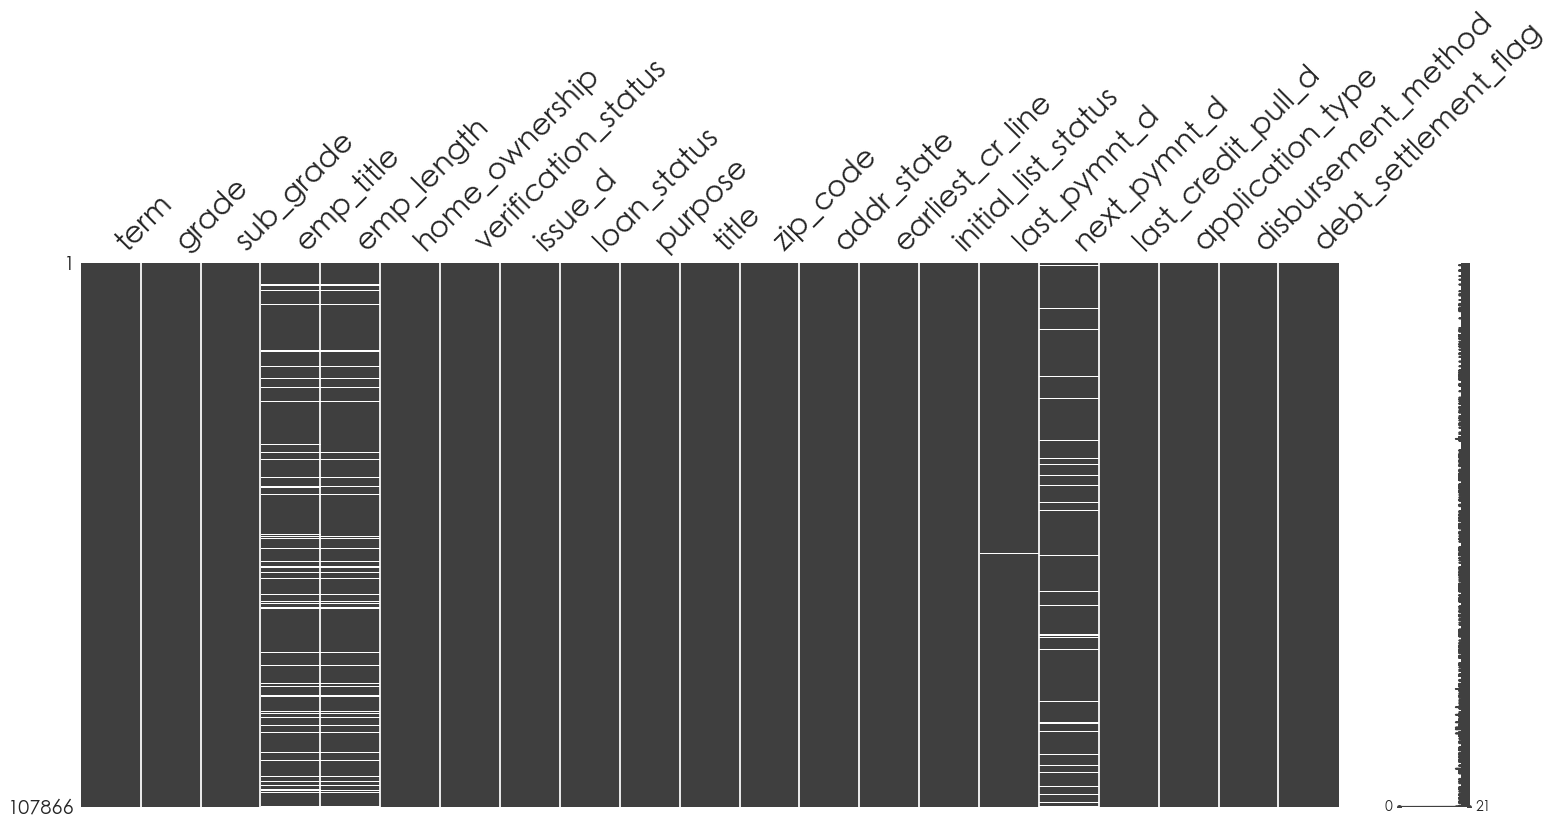

In [9]:
#图形化展示文本型特征的缺失值情况
objectCol= new_data.select_dtypes(include='O').columns
msno.matrix(new_data[objectCol],fontsize=30)

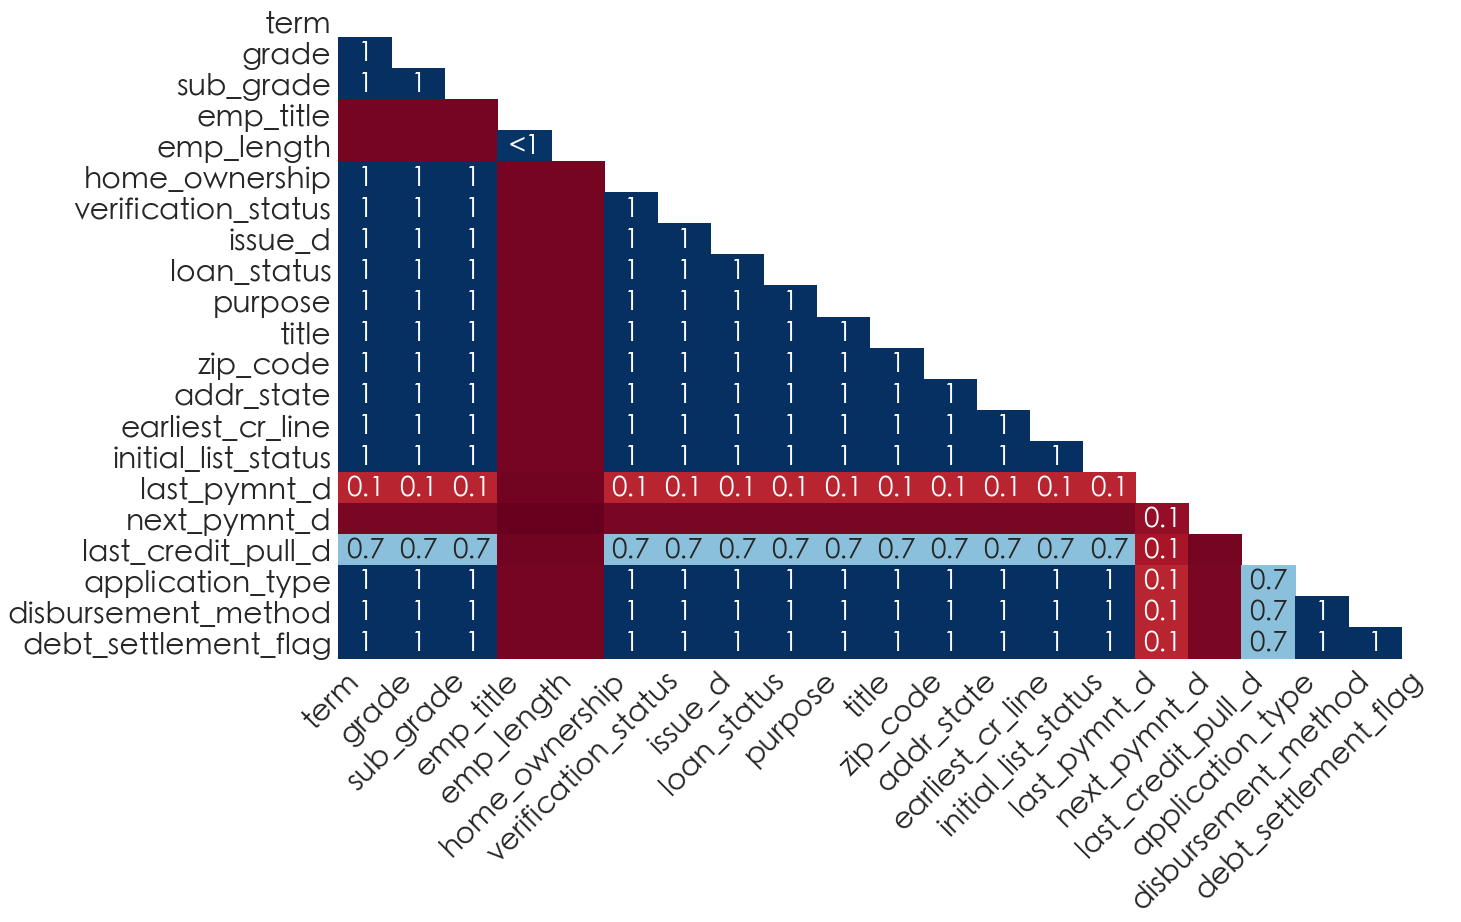

In [10]:
#查看特征之间的相关性
msno.heatmap(new_data[objectCol],fontsize=30)

/Users/nigle/untitled1/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


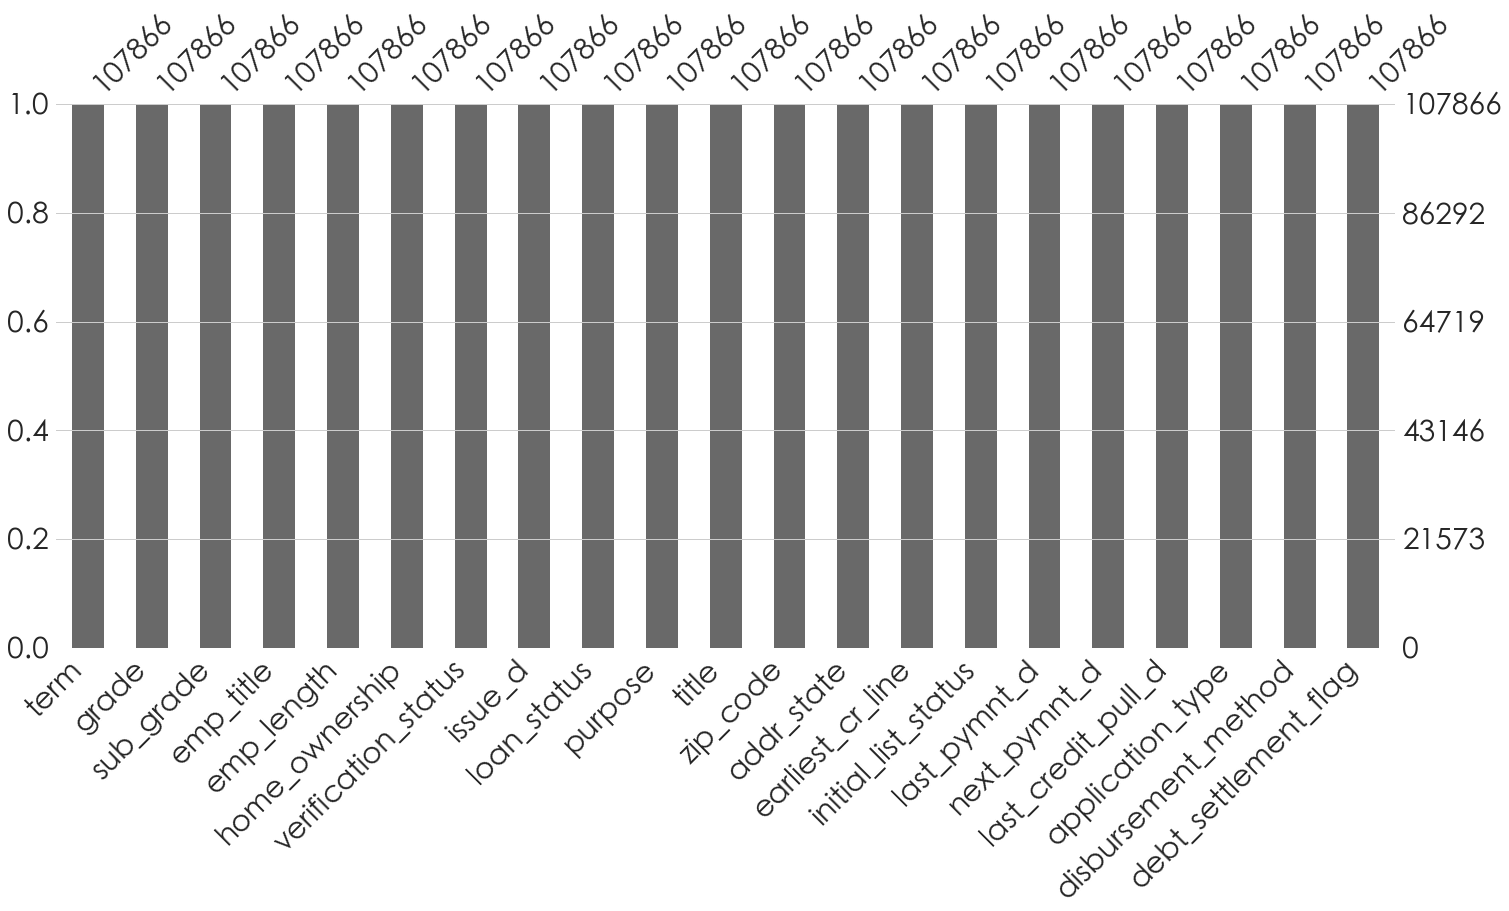

In [11]:
#填补文本型特征缺失值
new_data[objectCol] = new_data[objectCol].fillna('Unknown')
msno.bar(new_data[objectCol],fontsize=30)

In [12]:
#统计数值型特征的缺失值情况
numCol = new_data.select_dtypes(include=[np.number]).columns
new_data.select_dtypes(include=[np.number]).isnull().sum()

loan_amnt                         2
funded_amnt                       2
funded_amnt_inv                   2
int_rate                          2
installment                       2
annual_inc                        2
dti                             264
delinq_2yrs                       2
inq_last_6mths                    2
open_acc                          2
pub_rec                           2
revol_bal                         2
revol_util                      151
total_acc                         2
out_prncp                         2
out_prncp_inv                     2
total_pymnt                       2
total_pymnt_inv                   2
total_rec_prncp                   2
total_rec_int                     2
total_rec_late_fee                2
last_pymnt_amnt                   2
collections_12_mths_ex_med        2
acc_now_delinq                    2
tot_coll_amt                      2
tot_cur_bal                       2
open_acc_6m                       2
open_act_il                 

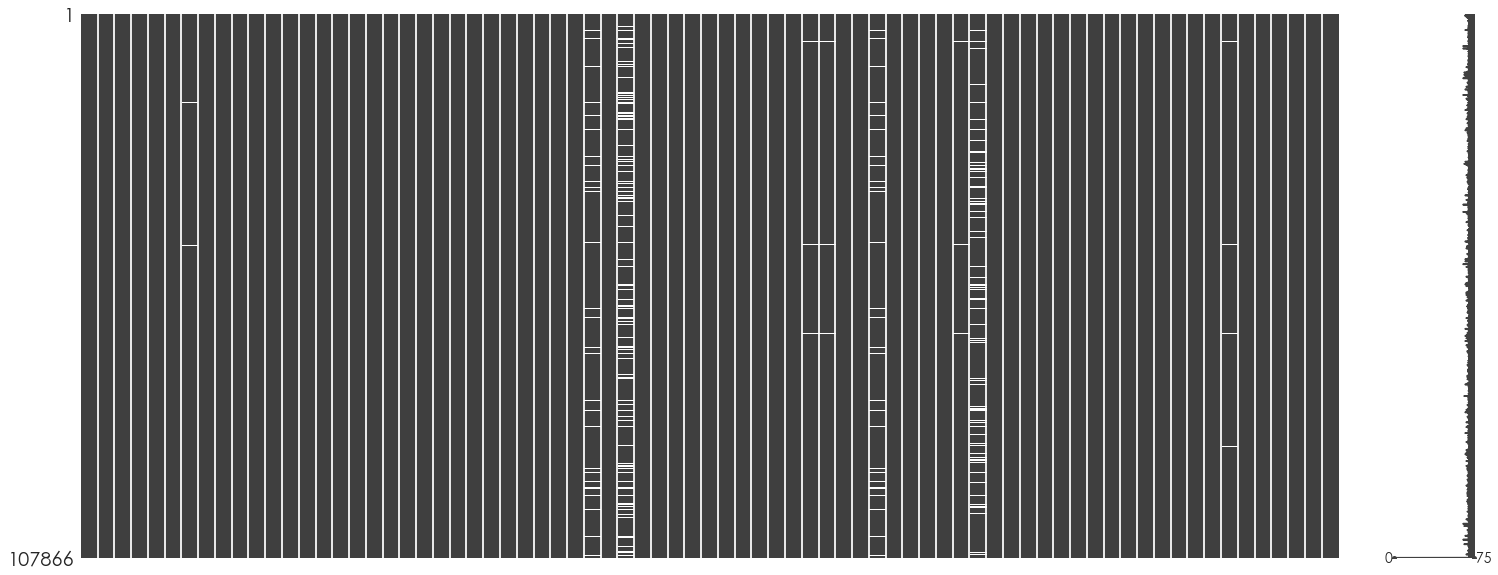

In [13]:
#图形化展示数值型缺失值的分布
msno.matrix(new_data[numCol],fontsize=30)

In [14]:
#改变pandas默认显示设置，展示所有列
pd.set_option('display.max_columns', len(new_data.columns))
new_data[numCol]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,18500.0,18500.0,18500.0,13.58,628.52,82985.00,18.66,1.0,0.0,22.0,1.0,13970.0,35.1,44.0,17228.23,17228.23,1857.650000,1857.65,1271.77,585.88,0.00,628.52,0.0,0.0,1333.0,53116.0,1.0,3.0,0.0,1.0,16.0,39146.0,64.0,1.0,4.0,4294.0,53.0,39800.0,1.0,0.0,1.0,5.0,2951.0,16314.0,40.5,0.0,0.0,141.0,167.0,0.0,0.0,2.0,0.0,1.0,0.0,5.0,10.0,7.0,12.0,6.0,19.0,36.0,10.0,22.0,0.0,0.0,1.0,95.5,0.0,1.0,0.0,100830.0,53116.0,27400.0,61030.0
1,7000.0,7000.0,7000.0,7.34,217.23,180700.00,18.98,1.0,1.0,13.0,0.0,10546.0,36.9,17.0,6473.55,6473.55,645.980000,645.98,526.45,119.53,0.00,217.23,0.0,0.0,696.0,286553.0,1.0,4.0,0.0,1.0,24.0,49674.0,15.0,2.0,2.0,4492.0,33.0,28600.0,0.0,0.0,2.0,3.0,22043.0,8787.0,50.9,0.0,0.0,97.0,165.0,3.0,3.0,1.0,89.0,3.0,0.0,3.0,5.0,4.0,5.0,7.0,7.0,8.0,5.0,13.0,0.0,0.0,2.0,94.1,0.0,0.0,0.0,410809.0,67331.0,17900.0,129270.0
2,16000.0,16000.0,16000.0,11.98,355.75,95000.00,11.79,0.0,1.0,11.0,0.0,10481.0,41.3,24.0,15406.06,15406.06,1045.950000,1045.95,593.94,452.01,0.00,355.75,0.0,0.0,0.0,149865.0,2.0,2.0,0.0,1.0,20.0,9524.0,42.0,3.0,4.0,5959.0,41.0,25400.0,1.0,1.0,2.0,5.0,13624.0,6494.0,51.2,0.0,0.0,263.0,110.0,1.0,1.0,1.0,4.0,1.0,0.0,2.0,4.0,3.0,3.0,12.0,8.0,11.0,4.0,11.0,0.0,0.0,3.0,95.8,33.3,0.0,0.0,195926.0,20005.0,13300.0,22864.0
3,28000.0,28000.0,28000.0,10.90,915.36,103000.00,30.76,0.0,0.0,12.0,0.0,21266.0,26.5,30.0,25998.85,25998.85,2754.560000,2754.56,2001.15,753.41,0.00,915.36,0.0,0.0,0.0,76475.0,3.0,3.0,2.0,3.0,4.0,55209.0,91.0,1.0,3.0,10750.0,41.0,80300.0,0.0,0.0,0.0,6.0,6373.0,59034.0,26.5,0.0,0.0,134.0,184.0,2.0,2.0,1.0,2.0,NaN,1.0,4.0,4.0,9.0,15.0,12.0,9.0,17.0,4.0,12.0,0.0,0.0,3.0,96.7,11.1,0.0,0.0,153679.0,76475.0,80300.0,73379.0
4,8300.0,8300.0,8300.0,7.34,257.58,40000.00,30.84,0.0,1.0,16.0,0.0,8507.0,50.9,27.0,7675.76,7675.76,765.970000,765.97,624.24,141.73,0.00,257.58,0.0,0.0,0.0,213693.0,2.0,8.0,0.0,1.0,24.0,40129.0,75.0,2.0,3.0,5134.0,69.0,16700.0,0.0,5.0,1.0,5.0,13356.0,5981.0,50.2,0.0,0.0,127.0,121.0,3.0,3.0,1.0,24.0,4.0,0.0,2.0,3.0,3.0,4.0,18.0,7.0,8.0,3.0,16.0,0.0,0.0,3.0,100.0,33.3,0.0,0.0,237274.0,48636.0,12000.0,53654.0
5,6000.0,6000.0,6000.0,6.07,182.73,42000.00,18.47,0.0,0.0,7.0,0.0,4815.0,23.8,12.0,5337.73,5337.73,744.140000,744.14,662.27,81.87,0.00,182.73,0.0,0.0,0.0,36467.0,2.0,1.0,1.0,1.0,6.0,31652.0,95.0,2.0,4.0,2573.0,68.0,20200.0,1.0,2.0,2.0,5.0,5210.0,12185.0,28.3,0.0,0.0,40.0,52.0,2.0,2.0,0.0,2.0,7.0,0.0,3.0,3.0,5.0,5.0,4.0,6.0,8.0,3.0,7.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,53699.0,36467.0,17000.0,33499.0
6,3125.0,3125.0,3125.0,21.85,119.11,100000.00,36.21,0.0,1.0,14.0,0.0,88682.0,74.8,23.0,2934.95,2934.95,349.740000,349.74,190.05,159.69,0.00,119.11,0.0,0.0,0.0,241181.0,1.0,2.0,2.0,4.0,6.0,46166.0,86.0,0.0,0.0,29381.0,78.0,118500.0,1.0,0.0,2.0,4.0,18552.0,28818.0,75.5,0.0,0.0,103.0,314.0,28.0,6.0,2.0,28.0,1.0,0.0,9.0,9.0,9.0,12.0,7.0,11.0,14.0,9.0,14.0,0.0,0.0,2.0,100.0,77.8,0.0,0.0,357500.0,134848.0,117500.0,54000.0
7,3000.0,3000.0,3000.0,11.98,99

In [15]:
#观测发现最后两个样本所有特征均为NaN，无意义
new_data.drop([107865,107864], inplace=True)
new_data[numCol].tail()

/Users/nigle/untitled1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
107859,5000.0,5000.0,4975.0,12.62,167.56,56000.0,35.50,0.0,0.0,14.0,2.0,13530.0,86.2,37.0,4291.75,4270.29,1001.850000,996.84,708.25,293.60,0.0,167.56,0.0,0.0,0.0,25414.0,0.0,3.0,0.0,2.0,14.0,11884.0,35.0,2.0,4.0,5200.0,51.0,15700.0,1.0,2.0,0.0,6.0,2118.0,953.0,93.2,0.0,0.0,166.0,271.0,7.0,7.0,3.0,7.0,15.0,1.0,7.0,8.0,7.0,14.0,9.0,11.0,25.0,8.0,14.0,0.0,0.0,2.0,86.5,100.0,0.0,2.0,50010.0,25414.0,14000.0,34310.0
107860,6000.0,6000.0,6000.0,10.91,196.18,50000.0,28.93,0.0,0.0,11.0,0.0,6950.0,51.9,14.0,5130.67,5130.67,1173.440000,1173.44,869.33,304.11,0.0,196.18,0.0,0.0,0.0,230614.0,0.0,1.0,1.0,1.0,9.0,18497.0,83.0,1.0,1.0,2257.0,71.0,13400.0,1.0,0.0,2.0,2.0,20965.0,5850.0,54.3,0.0,0.0,9.0,246.0,7.0,7.0,2.0,45.0,7.0,1.0,8.0,8.0,8.0,9.0,1.0,9.0,11.0,8.0,11.0,0.0,0.0,2.0,78.6,12.5,0.0,0.0,275650.0,25447.0,12800.0,22250.0
107861,4375.0,4375.0,4375.0,14.08,149.70,52000.0,33.72,0.0,0.0,22.0,0.0,28116.0,49.2,41.0,3871.49,3871.49,745.080000,745.08,503.51,241.57,0.0,149.70,0.0,0.0,249.0,217780.0,1.0,2.0,0.0,2.0,18.0,22184.0,66.0,1.0,3.0,6844.0,56.0,57200.0,3.0,0.0,0.0,5.0,9899.0,17696.0,52.7,0.0,0.0,122.0,286.0,1.0,1.0,3.0,1.0,17.0,0.0,5.0,10.0,7.0,14.0,4.0,19.0,34.0,10.0,22.0,0.0,0.0,1.0,100.0,42.9,0.0,0.0,274690.0,50300.0,37400.0,33419.0
107862,12000.0,12000.0,11975.0,10.42,389.58,36000.0,11.10,1.0,0.0,14.0,0.0,11648.0,43.6,18.0,10186.22,10165.00,2393.050000,2388.06,1813.78,579.27,0.0,400.00,0.0,0.0,0.0,191131.0,2.0,1.0,0.0,0.0,115.0,105786.0,NaN,3.0,6.0,3662.0,44.0,26700.0,1.0,0.0,1.0,6.0,14702.0,7510.0,46.0,0.0,0.0,185.0,235.0,0.0,0.0,1.0,15.0,11.0,1.0,3.0,6.0,4.0,4.0,5.0,12.0,12.0,6.0,14.0,0.0,1.0,3.0,94.1,50.0,0.0,0.0,172918.0,117434.0,13900.0,60818.0
107863,14000.0,14000.0,13975.0,13.59,475.71,80000.0,1.35,0.0,1.0,11.0,0.0,1461.0,4.1,21.0,0.00,0.00,14662.947011,14636.76,14000.00,662.95,0.0,11646.39,0.0,0.0,0.0,1461.0,1.0,0.0,0.0,1.0,17.0,0.0,NaN,1.0,2.0,1406.0,4.0,35300.0,2.0,0.0,2.0,3.0,162.0,28839.0,4.8,0.0,0.0,52.0,125.0,3.0,3.0,0.0,3.0,0.0,5.0,4.0,4.0,8.0,14.0,2.0,11.0,19.0,4.0,11.0,0.0,0.0,1.0,75.0,0.0,0.0,0.0,35300.0,1461.0,30300.0,0.0


In [16]:
from sklearn.preprocessing import Imputer

#对数值型特征的缺失值，采用均值的方法进行填补
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)  
imr = imr.fit(new_data[numCol])
new_data[numCol] = imr.transform(new_data[numCol])

/Users/nigle/untitled1/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nigle/untitled1/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


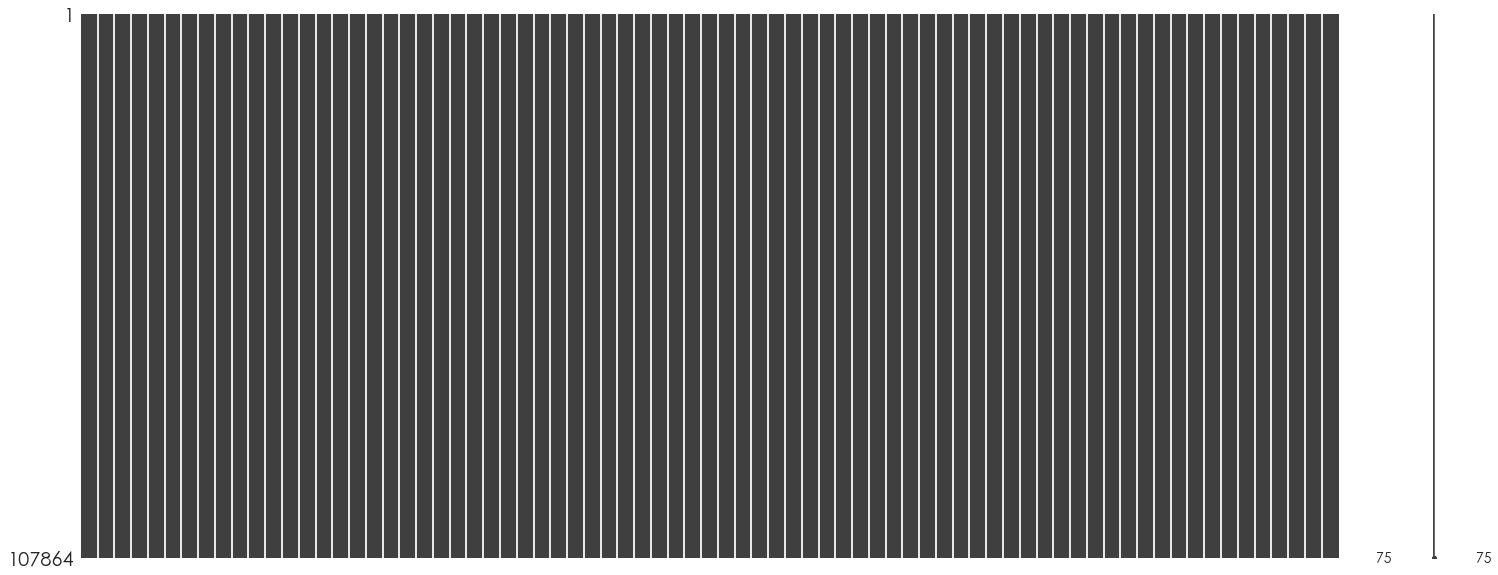

In [17]:
#数值型特征填补后的图形展示
msno.matrix(new_data[numCol])

In [18]:
#对每个文本型特征进行分类统计
var = new_data[objectCol].columns
for i in var:
    print('\nFrequency count for variable {0}'.format(i))
    print(new_data[i].value_counts())
new_data[objectCol].shape


Frequency count for variable term
 36 months    75412
 60 months    32452
Name: term, dtype: int64

Frequency count for variable grade
B    32482
C    28747
A    26769
D    15377
E     3691
F      682
G      116
Name: grade, dtype: int64

Frequency count for variable sub_grade
B5    6974
B1    6933
B2    6759
C1    6458
A4    6198
B3    5924
B4    5892
C3    5787
C2    5761
A3    5688
C4    5669
A5    5321
C5    5072
A2    5052
A1    4510
D1    3479
D2    3329
D3    3164
D4    2796
D5    2609
E3     863
E5     838
E2     805
E4     732
E1     453
F1     397
G1     102
F3      79
F2      78
F4      65
F5      63
G4       5
G2       5
G3       3
G5       1
Name: sub_grade, dtype: int64

Frequency count for variable emp_title
Unknown                                   9613
Teacher                                   1921
Manager                                   1898
Owner                                     1827
Driver                                    1035
Registered Nurse               

(107864, 21)

In [19]:
#观察上述结果
#1.grade与sub_grade的结果重复
#2.emp_title存在较多缺失值，不具有有代表性
#3.title与purpose信息重复
#4.zip_code 邮编，无用
#5.addr_state 申请地址，无用
#6.initial_list_status 初始状态表，无用
#7.issue_d 贷款发行时间，影响模型判断
#8.'last_credit_pull_d','last_pymnt_d','last_pymnt_amnt','next_pymnt_d' 贷后信息，影响模型判断
#9.disbursement_method 还款方式，无用
#10.debt_settlement_flag 是否清算，与loan_status信息重复，且还款与清算无较大联系
#11.earliest_cr_line 最早贷款时间，无用

#对过滤后的特征进行删除
drop_list = ['sub_grade', 'emp_title', 'title', 'zip_code', 'addr_state',
            'initial_list_status', 'issue_d', 'last_credit_pull_d','last_pymnt_d',
            'last_pymnt_amnt','next_pymnt_d','disbursement_method',
            'debt_settlement_flag','earliest_cr_line']
new_data.drop(drop_list, axis=1, inplace=True)

/Users/nigle/untitled1/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
#查看文本型特征过滤后的情况
new_data.select_dtypes(include='O')

,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,application_type
0,36 months,C,6 years,MORTGAGE,Not Verified,Current,home_improvement,Individual
1,36 months,A,10+ years,MORTGAGE,Not Verified,Current,debt_consolidation,Individual
2,60 months,B,5 years,MORTGAGE,Not Verified,Current,home_improvement,Joint App
3,36 months,B,6 years,MORTGAGE,Source Verified,Current,debt_consolidation,Individual
4,36 months,A,4 years,MORTGAGE,Not Verified,Current,debt_consolidation,Joint App
5,36 months,A,5 years,RENT,Not Verified,Current,debt_consolidation,Individual
6,36 months,D,10+ years,MORTGAGE,Verified,Current,small_business,Individual
7,36 months,B,10+ years,OWN,Source Verified,Current,debt_consolidation,Individual
8,36 months,B,1 year,MORTGAGE,Source Verified,Current,other,Individual
9,36 months,A,Unknown,MORTGAGE,Not Verified,Current,debt_consolidation,Individual


In [21]:
#通过观察发现annual_inc年收入有为0的值，对此采用众数进行替换
# new_data.loc[new_data['annual_inc'] == 0]['annual_inc']
new_data.loc[new_data['annual_inc'] == 0, 'annual_inc'] =  new_data['annual_inc'].mode().iloc[0]

#对特征进行衍生，采用每月还款数与每月收入的比值，间接反应贷款人的债务情况
new_data['installment_feat'] = new_data['installment'] / (new_data['annual_inc'] / 12)

#编写函数进行特征值的替换
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded


/Users/nigle/untitled1/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/nigle/untitled1/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#观察loan_status的种类和数量
pd.value_counts(new_data['loan_status'])

Current               100414
Fully Paid              5390
Late (31-120 days)       873
In Grace Period          668
Late (16-30 days)        389
Charged Off              109
Default                   21
Name: loan_status, dtype: int64

In [23]:
#对于已还款和全额还款的赋值为0
#对于延期还款，及未还款等赋值为1
new_data['loan_status'] = coding(new_data['loan_status'], {'Current':0, 'Fully Paid':0, 'In Grace Period':1,
                                                          'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1,
                                                          'Default':1})

print('\nAfter Coding:')
pd.value_counts(new_data['loan_status']) #查看loan_status分类

/Users/nigle/untitled1/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """



After Coding:


0    105804
1      2060
Name: loan_status, dtype: int64

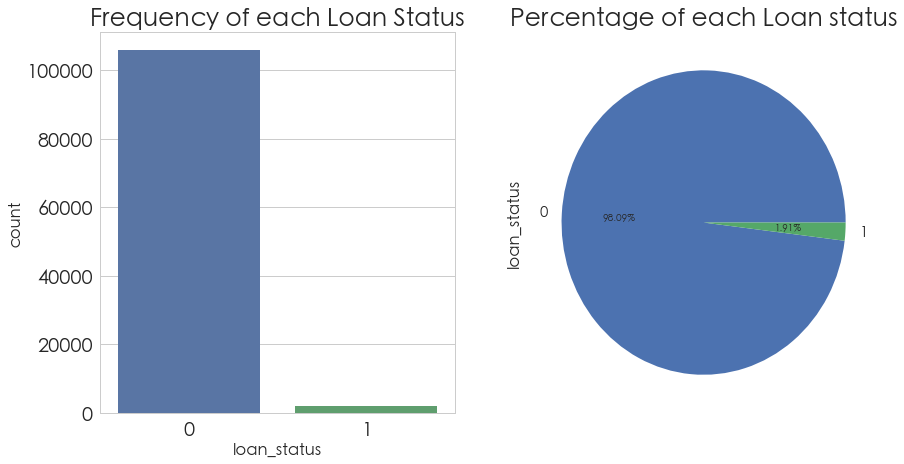

In [24]:
#图形化loan_status分类
fig, axs = plt.subplots(1, 2, figsize=(14,7))


sns.countplot(x='loan_status', data=new_data, ax=axs[0])
axs[0].set_title('Frequency of each Loan Status', fontsize=25)
axs[0].tick_params(labelsize=20)

new_data['loan_status'].value_counts().plot(x=None, y=None, kind='pie', ax=axs[1], autopct='%1.2f%%')
axs[1].set_title('Percentage of each Loan status',fontsize=25)
axs[1].tick_params(labelsize=20)

plt.show()

In [25]:
new_data.select_dtypes(include='O').iloc[0]

term                          36 months
grade                                 C
emp_length                      6 years
home_ownership                 MORTGAGE
verification_status        Not Verified
purpose                home_improvement
application_type             Individual
Name: 0, dtype: object

In [26]:
#查看文本型变量的分类
print(new_data['emp_length'].value_counts())
print()
print(new_data['grade'].value_counts())

10+ years    35706
2 years      10191
Unknown       9428
3 years       9179
< 1 year      7339
1 year        7169
4 years       6918
5 years       6815
6 years       4716
7 years       4002
8 years       3278
9 years       3123
Name: emp_length, dtype: int64

B    32482
C    28747
A    26769
D    15377
E     3691
F      682
G      116
Name: grade, dtype: int64


In [27]:
#对文本型特征进行数值映射，方便参与计算
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "Unknown": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

new_data = new_data.replace(mapping_dict)
new_data[['emp_length', 'grade']]

,emp_length,grade
0,6,3
1,10,1
2,5,2
3,6,2
4,4,1
5,5,1
6,10,4
7,10,2
8,1,2
9,0,1


In [28]:
#对多值无序变量进行毒热编码，参与算法运算
n_columns = ['home_ownership', 'verification_status','application_type','purpose','term']
dummpy_df = pd.get_dummies(new_data[n_columns])
new_data = pd.concat([new_data, dummpy_df], axis=1)

In [29]:
new_data.loc[:,new_data.columns.str.contains('home_ownership')].head()

,home_ownership,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,MORTGAGE,0,1,0,0
1,MORTGAGE,0,1,0,0
2,MORTGAGE,0,1,0,0
3,MORTGAGE,0,1,0,0
4,MORTGAGE,0,1,0,0


In [30]:
#删除原来多值无序变量
new_data = new_data.drop(n_columns, axis=1)

In [31]:
#编译后的数据集类型可以参与计算
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107864 entries, 0 to 107863
Columns: 102 entries, loan_amnt to term_ 60 months
dtypes: float64(75), int64(3), uint8(24)
memory usage: 67.5 MB


In [32]:
col = new_data.select_dtypes(include=['int64', 'float64']).columns

In [33]:
from sklearn.preprocessing import StandardScaler

#通过观测各数值型特征之间的差异较大，采用标准化减小差异
col = col.drop('loan_status')
new_data_ml_df = new_data
sc = StandardScaler()
new_data_ml_df[col] = sc.fit_transform(new_data_ml_df[col])

In [34]:
new_data_ml_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,...,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,installment_feat,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_Individual,application_type_Joint App,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,0.230957,0.230957,0.231384,0.230637,0.549247,0.488342,0.148811,0.056027,0,-0.045395,1.062724,-0.618195,1.806803,1.691115,-0.095751,-0.329177,1.777814,0.319418,0.319807,-0.200627,-0.200484,-0.191176,-0.098109,-0.059126,-0.117046,-0.015527,0.041902,-0.540814,0.084718,0.117530,-0.710596,-0.323192,-0.219292,0.103109,-0.163634,-0.150286,0.553312,-0.275453,-0.025462,0.039411,-0.030744,-0.553948,-0.402399,0.195286,-0.625240,0.044183,-0.297691,-0.070563,...,-0.753774,-1.136988e+00,-0.336505,0.596034,1.392062,0.676573,1.050845,-0.282090,2.240360,2.920274,1.446871,1.813750,-0.014604,-0.145207,-0.538163,0.092692,-0.936593,2.612292,-0.111003,-0.447224,0.042104,0.017127,0.337757,-0.008630,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-0.898268,-0.898268,-0.897968,-1.016528,-0.872797,-1.245770,1.173668,1.328607,0,-0.030695,1.062724,0.722018,0.276025,-0.329919,-0.250151,-0.257554,-0.467113,-0.777256,-0.776983,-0.497668,-0.497581,-0.377447,-0.956485,-0.059126,-0.117046,-0.015527,0.016230,0.851904,0.084718,0.458804,-0.710596,-0.323192,0.088299,0.339839,-2.387160,0.528117,-0.237886,-0.240030,-0.957889,-0.265644,-0.699737,-0.553948,0.019056,-0.431452,0.466573,-0.338103,0.061333,-0.070563,...,1.874357,-7.811760e-01,-0.336505,-0.234551,-0.078277,-0.259765,-0.481087,-0.144426,-0.218194,-0.630345,-0.064836,0.280728,-0.014604,-0.145207,-0.000986,-0.062231,-0.936593,-0.369678,-0.111003,1.195774,0.315958,-0.350695,1.781409,-0.009783,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.014527,-0.014527,-0.014127,-0.089149,-0.393861,-0.378714,-0.107404,0.212503,0,-0.360976,-0.306364,0.722018,-0.064148,-0.329919,-0.253082,-0.082476,0.114905,0.133608,0.133977,-0.399615,-0.399510,-0.360580,-0.344513,-0.059126,-0.117046,-0.015527,-0.011819,0.036404,0.975889,-0.223744,-0.710596,-0.323192,-0.065497,-0.562965,-1.161952,1.206520,0.553312,0.022427,-0.584918,-0.352803,-0.030744,-0.174130,0.019056,0.195286,-0.014884,-0.454562,0.071690,-0.070563,...,-0.635656,-1.136988e+00,-0.336505,-0.649843,-0.372345,-0.571878,-0.918782,0.543895,-0.013315,-0.249922,-0.367177,-0.059944,-0.014604,-0.145207,0.536191,0.125890,0.024414,-0.369678,-0.111003,0.056818,-0.595784,-0.528798,-0.469663,-0.009323,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1.163794,1.163794,1.164326,-0.305005,1.541003,-0.378714,0.148811,0.316690,0,0.510434,-0.306364,-0.618195,0.105938,-0.329919,0.233251,-0.671374,0.613778,1.213773,1.214257,0.019250,0.019436,-0.008888,0.210252,-0.059126,-0.117046,-0.015527,-0.01

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#由于对于是否违约属于二分类问题，所以采用逻辑回归进行特征选择，对于相关性小的特征进行移除，增强泛化能力
x_feature = list(new_data_ml_df.columns)
x_feature.remove('loan_status')
x_val = new_data_ml_df[x_feature]
y_val = new_data_ml_df['loan_status']


lg = LogisticRegression()
rfe = RFE(lg, 30) #通过递归删除特征选出相关性最强的前30个特征
rfe = rfe.fit(x_val, y_val)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False False False False False False
 False False False False  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False  True False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True False  True False False False False False  True False False
 False  True  True  True  True]
[ 1  1  1  1  1  1 41 63 40 60 18 55 25 22 54 28  1  1  1  1  1  1  1 52
 47 72 31 56 13 58 64 49 12 37 44 17 70 14 23 68 30 57 16 59 24 33 53 61
 51 36 69 39 66 50 67 45  9  1  8 34 29 15 65  1 10 48 46 43 71 42 26 27
 32 21 38 11 20  1  1  1  1  1  1  1  1  1  2  1  3  4  6  7 19  1 62  5
 35  1  1  1  1]


In [36]:
#查看移除后的特征
col_filter = x_val.columns[rfe.support_]

col_filter

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_Individual', 'application_type_Joint App',
       'purpose_credit_card', 'purpose_moving', 'purpose_vacation',
       'purpose_wedding', 'term_ 36 months', 'term_ 60 months'],
      dtype='object')

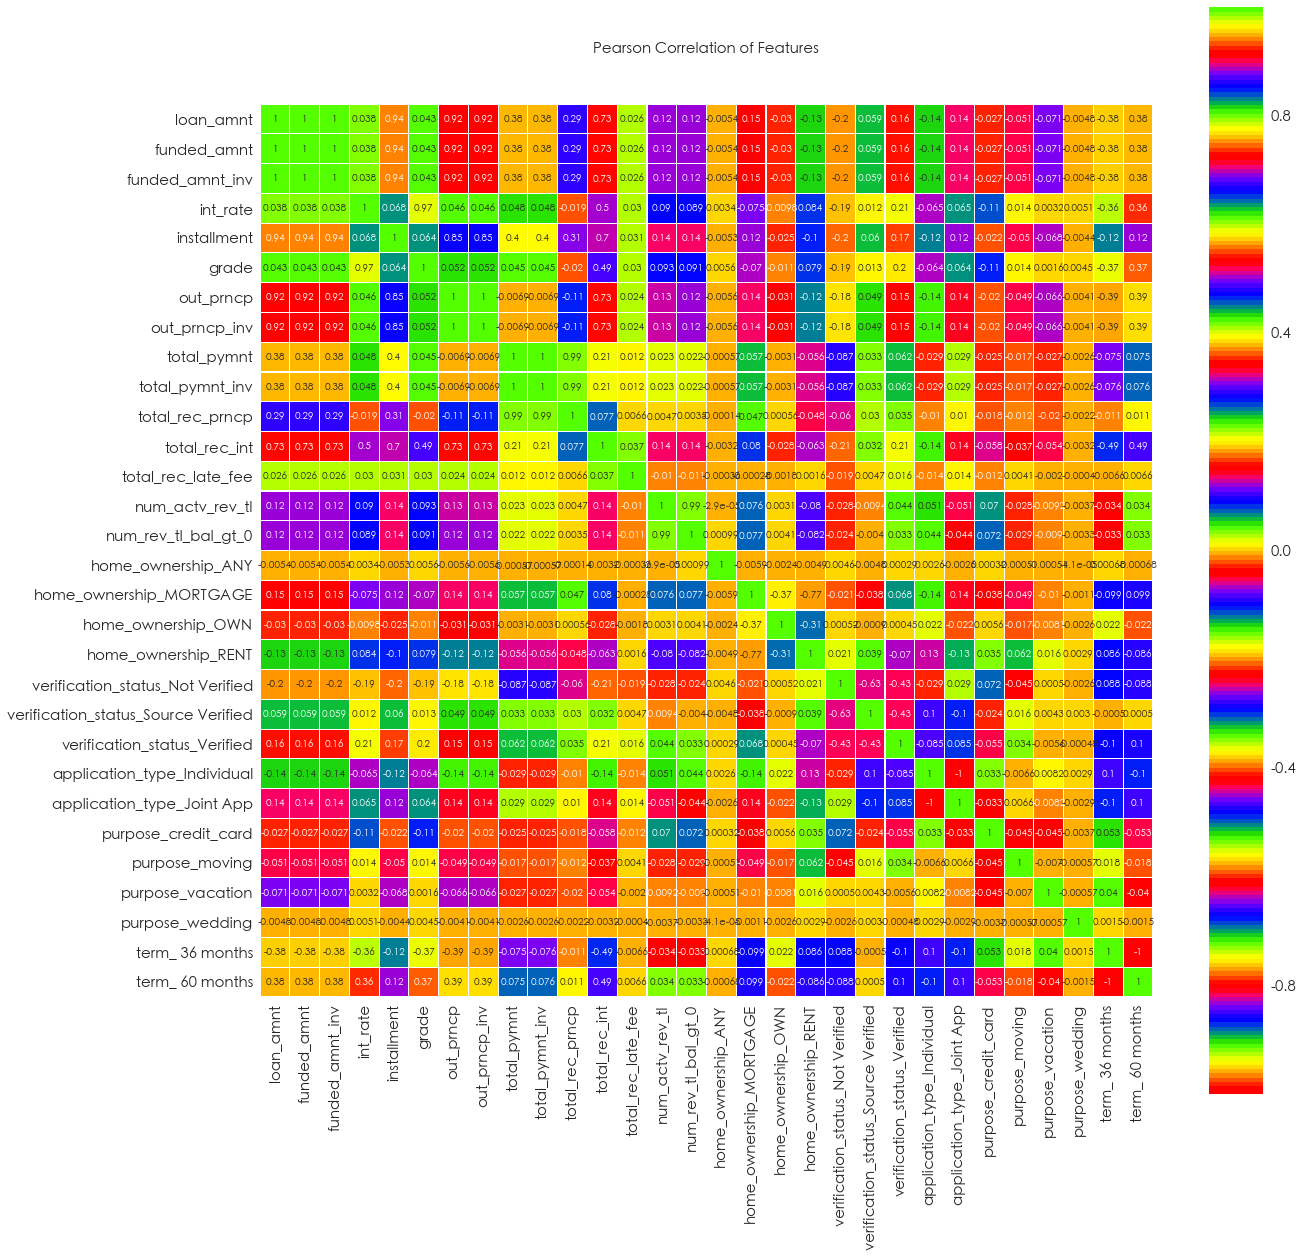

In [37]:
colormap = plt.cm.prism #调整颜色图谱
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(new_data_ml_df[col_filter].corr(), linewidth=0.1, vmax=1.0, square=True,
           cmap=colormap, linecolor='white', annot=True) #annot写入相关性

In [39]:
drop_col = ['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'home_ownership_RENT',
           'verification_status_Not Verified', 'application_type_Individual', 'purpose_credit_card', 'purpose_moving', 'purpose_vacation',
           'term_ 36 months','total_pymnt','num_actv_rev_tl','total_pymnt_inv','int_rate','total_rec_prncp']
new_col = col_filter.drop(drop_col) #去除冗余数据，减少共线性对模型的影响

In [40]:
len(new_col)

12

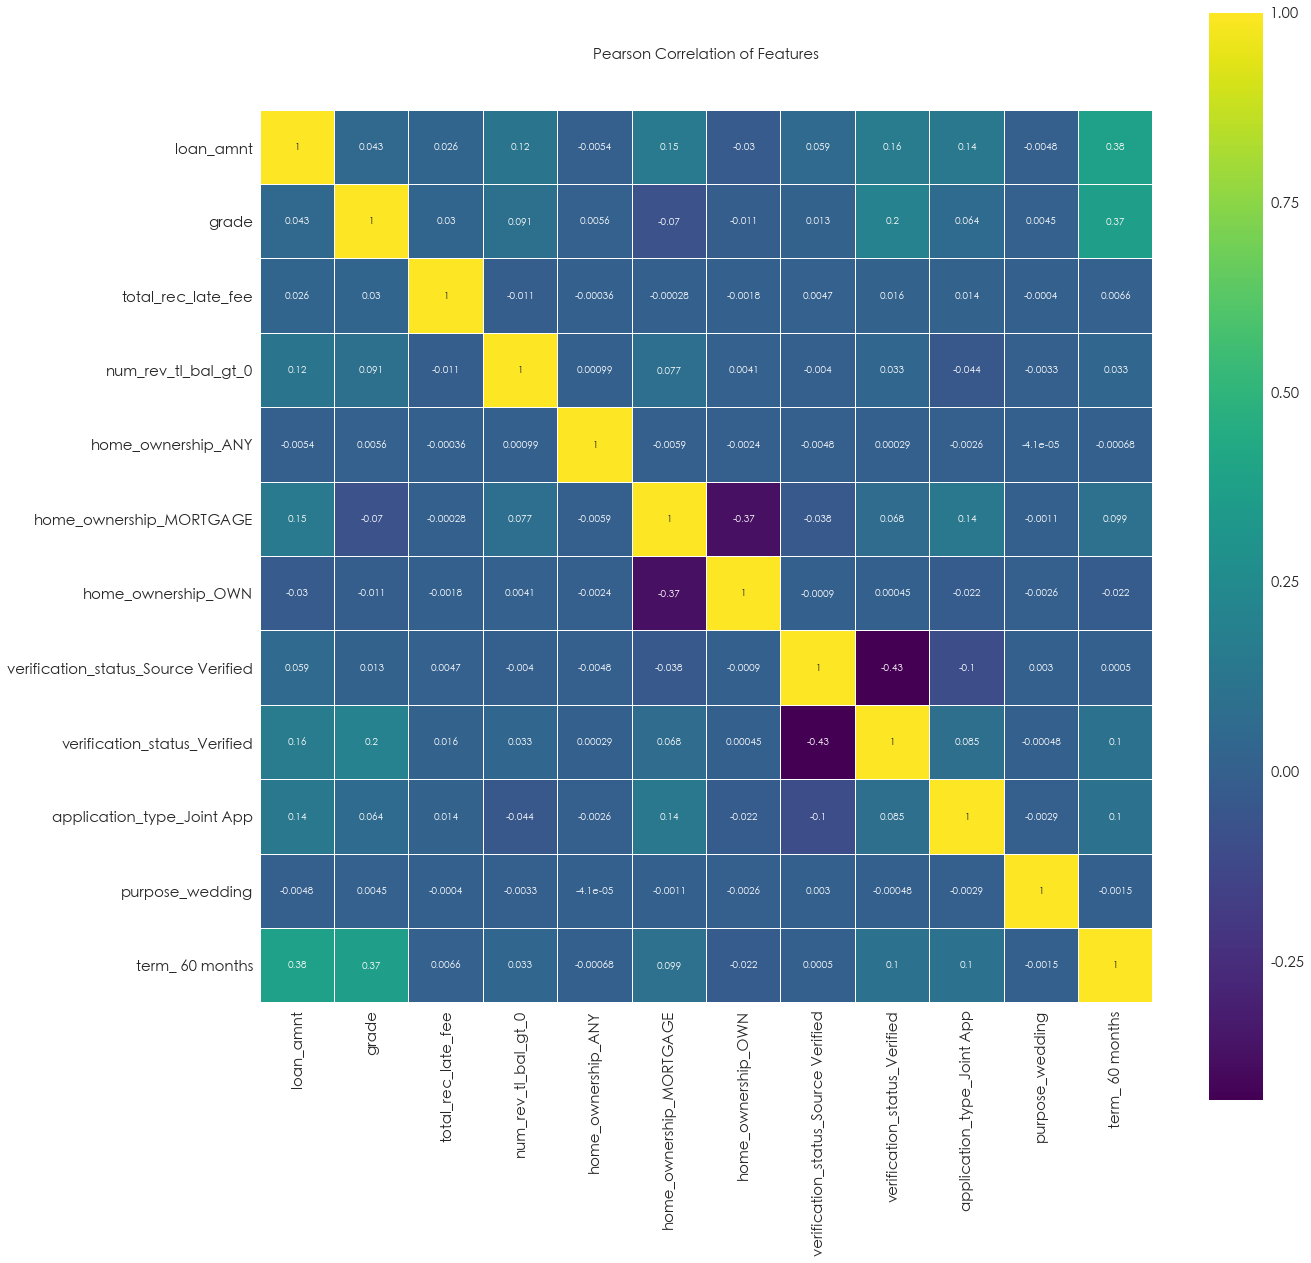

In [41]:
#选择后的图例
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(new_data_ml_df[new_col].corr(), linewidth=0.1, vmax=1.0, square=True,
           cmap=colormap, linecolor='white', annot=True)

In [42]:
from sklearn.ensemble import RandomForestClassifier

#使用随机森林对特征的重要性进行拟合
names = new_data_ml_df[new_col].columns
clf = RandomForestClassifier(n_estimators=10, random_state=123)
clf.fit(x_val[new_col], y_val)
for feature in zip(names, clf.feature_importances_):
    print(feature)

('loan_amnt', 0.5153827842773179)
('grade', 0.0703451810305423)
('total_rec_late_fee', 0.09369259046626208)
('num_rev_tl_bal_gt_0', 0.22892344446515542)
('home_ownership_ANY', 1.6689011463304796e-06)
('home_ownership_MORTGAGE', 0.016957417939321567)
('home_ownership_OWN', 0.015071003381885545)
('verification_status_Source Verified', 0.017219674540726197)
('verification_status_Verified', 0.013932420689642433)
('application_type_Joint App', 0.016017203251964037)
('purpose_wedding', 0.0005789891250849097)
('term_ 60 months', 0.011877621930951203)


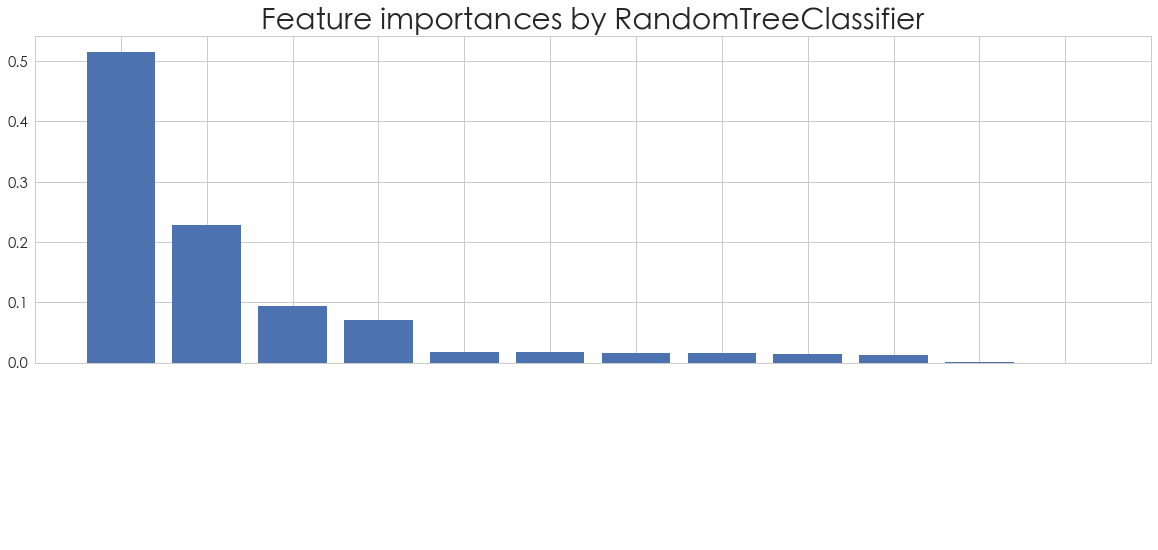

In [43]:
#随机森林特征重要性展示
plt.figure(figsize=(20,6))
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
plt.title('Feature importances by RandomTreeClassifier', fontsize=30)
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), feat_names[indices], rotation=45, fontsize=14, color='w')
plt.xlim([-1, len(indices)])
plt.show()

In [44]:
#对样本不平衡问题进行过采样处理
X = new_data_ml_df[new_col]
y = new_data_ml_df['loan_status']

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('总样本数：{}; 正例样本百分比：{:.2%}; 负例样本百分比：{:.2%}'.format(n_sample, n_pos_sample/n_sample, n_neg_sample/n_sample))
print('特征数：', X.shape[1])

总样本数：107864; 正例样本百分比：98.09%; 负例样本百分比：1.91%
特征数： 12


In [45]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('总样本数：{}; 正例样本百分比：{:.2%}; 负例样本百分比：{:.2%}'.format(n_sample, n_pos_sample/n_sample, n_neg_sample/n_sample))

总样本数：211608; 正例样本百分比：50.00%; 负例样本百分比：50.00%


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split

#使用交叉验证、王哥搜索，提高模型的准确率，并选出最优参数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
params_grid = {
    'C':[0.01, 0.1, 1, 10, 100, 1000],
    'penalty':['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(), params_grid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

/Users/nigle/untitled1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nigle/untitled1/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.65792, std: 0.00315, params: {'C': 0.01, 'penalty': 'l1'},
  mean: 0.65761, std: 0.00290, params: {'C': 0.01, 'penalty': 'l2'},
  mean: 0.65762, std: 0.00285, params: {'C': 0.1, 'penalty': 'l1'},
  mean: 0.65760, std: 0.00297, params: {'C': 0.1, 'penalty': 'l2'},
  mean: 0.65751, std: 0.00304, params: {'C': 1, 'penalty': 'l1'},
  mean: 0.65753, std: 0.00302, params: {'C': 1, 'penalty': 'l2'},
  mean: 0.65754, std: 0.00304, params: {'C': 10, 'penalty': 'l1'},
  mean: 0.65748, std: 0.00301, params: {'C': 10, 'penalty': 'l2'},
  mean: 0.65753, std: 0.00300, params: {'C': 100, 'penalty': 'l1'},
  mean: 0.65749, std: 0.00301, params: {'C': 100, 'penalty': 'l2'},
  mean: 0.65754, std: 0.00304, params: {'C': 1000, 'penalty': 'l1'},
  mean: 0.65749, std: 0.00302, params: {'C': 1000, 'penalty': 'l2'}],
 {'C': 0.01, 'penalty': 'l1'},
 0.6579240506329114)

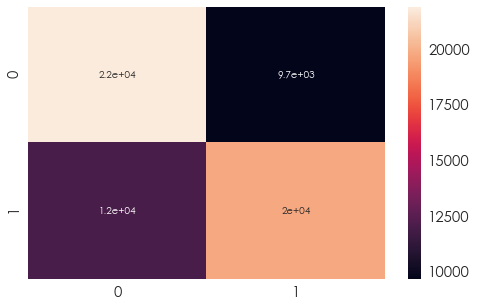

In [47]:
from sklearn.metrics import confusion_matrix

#
m = confusion_matrix(y_test, grid_search.predict(X_test))
plt.figure(figsize=(8,5))
sns.heatmap(m, annot=True)


In [48]:
from sklearn.metrics import roc_auc_score

#roc_auc,查看模型预测能力
roc_auc = roc_auc_score(y_test, grid_search.predict(X_test))
print('Area under the ROC curve: %f' % roc_auc)

Area under the ROC curve: 0.657403


In [49]:
from sklearn.metrics import classification_report

#使用classification_report， 分别快速查看精准率， 召回率， f1值， 出现次数
print(classification_report(y_test, grid_search.predict(X_test)))

             precision    recall  f1-score   support

          0       0.65      0.69      0.67     31617
          1       0.67      0.62      0.65     31866

avg / total       0.66      0.66      0.66     63483

